In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import random

In [2]:
expression = pd.read_pickle('pca_BAL.pkl')

In [3]:
expression = expression.transpose()

In [4]:
expression
#105 columns (samples)
#86 rows (genes)

#we are clustering the columns (the samples)

,0,1,2,3,4,5,6,7,8,9,...,94,95,96,97,98,99,100,101,102,103
0,48.119132,10.643192,4.220356,97.420104,9.706413,0.880890,-42.561492,17.984458,-21.438558,33.583612,...,-41.547370,-76.881888,3.531979,-7.083972,90.834303,-61.059138,-14.623621,27.402555,23.517848,-26.146292
1,-3.548248,-33.023650,39.444240,3.533185,21.690323,8.535571,-22.848571,-7.100013,-21.515630,4.422462,...,-40.052783,108.233136,8.755456,-21.513230,-10.437142,-26.013132,19.063319,11.121717,0.142869,-27.274353
2,16.191960,-5.482717,24.764145,11.189075,-23.646517,-39.139449,7.256876,4.337584,-12.418022,2.118523,...,9.322172,42.584765,-104.280710,-17.251761,-23.746377,-14.333061,-64.098920,-21.250292,36.707245,-46.371420
3,8.420214,-19.304121,-5.582832,41.310038,-17.084388,-15.522933,3.563338,-10.573481,-38.177788,0.400109,...,29.259401,52.093424,83.342706,15.569922,-16.259359,-5.668071,-68.285802,-15.209396,-5.452727,23.990887
4,12.723493,-8.339659,-14.850010,-2.727261,77.255109,1.896271,-13.678501,-24.465449,-21.756047,-46.866004,...,10.336445,11.723550,-29.598407,15.272325,-39.884837,-17.831148,56.579107,-9.524526,18.661110,36.794405
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81,1.541199,8.390431,0.769798,5.208201,0.741095,7.021787,-1.907671,3.185436,1.147689,0.887328,...,-1.085337,-1.936279,-3.515121,-10.541894,-1.370762,-0.775169,3.556067,-0.300099,2.797037,3.496535
82,5.444059,-0.910520,4.749653,6.410709,0.554332,-6.348335,7.572695,10.581877,-11.891376,-1.078967,...,3.029991,5.490305,0.458893,-5.494544,6.946298,1.330152,-1.230678,-1.285542,-1.557220,3.877359
83,-1.293897,3.629012,-1.603969,0.907898,0.418424,-5.007185,2.483512,-3.770791,-4.202072,-0.679921,...,0.596785,-0.286788,4.114784,-14.067943,0.935179,4.332566,3.135661,-0.648872,-9.288516,0.842910
84,5.777953,-0.574947,-6.121254,3.274566,0.639459,9.704776,2.747227,-13.910483,-3.682314,1.111015,...,2.453329,-10.931026,0.834212,2.360210,-3.271611,-5.174084,-0.013443,-4.455468,-3.911131,2.724550


In [5]:
#input: expression data, initializations, k
#ouput: objective list, k clusters (lists of expression column names)

def KMeans(k, expressionData, centroids):
    #objective list to track convergence
    objectiveList = [2, 3]
    
    while objectiveList[-1] != objectiveList[-2]:
        #first, assign initial clusters
        clusters = get_clusters(k, expressionData, centroids)
    
        #calculate objective and add to objective list
        objective = calc_objective(clusters, expressionData, centroids)
        objectiveList.append(objective)
    
        #calculate new means and update centroids
        centroids = calc_means(clusters, expressionData)
    
    return objectiveList[2:], clusters

In [6]:
def get_clusters(k, expressionData, centroids):
    if k != len(centroids.columns):
        print('ERROR: num centroids does not correspond with num clusters')
    
    clusters = np.empty((k, 0)).tolist()
    for expCol in expressionData:
        #distances holds distances of column to each centroid
        distances = []
        
        for centCol in centroids:
            distance = get_dist(centroids[centCol], expressionData[expCol])
            distances.append(distance)
        
        closest_centroid = distances.index(min(distances))
        clusters[closest_centroid].append(expCol)
    return clusters
            

In [7]:
def get_dist(point1, point2):
    dist = np.sqrt(sum((point1 - point2) ** 2))
    return dist

In [8]:
def calc_objective(clusters, expressionData, centroids):
    total_distances = []
    
    for cluster in range(len(clusters)):
        #for each cluster
        cluster_distances = [] #initialize distances array to hold distances from every point in cluster to centroid 
        
        for val in clusters[cluster]:
            #for every point in cluster
            dist = (get_dist(centroids[cluster], expressionData[val]))**2 #get distance from point to centroid
            cluster_distances.append(dist) #append to list
        
        #sum distances for the cluster
        sum_one_cluster = sum(cluster_distances)
        total_distances.append(sum_one_cluster)
    
    return sum(total_distances)

In [9]:
def calc_means(clusters, expressionData):
    means = pd.DataFrame()
    
    new_centroid = [0]
    for cluster in clusters:
        #at first cluster
        for val in cluster:
            new_centroid += expressionData[val]
        
        new_centroid = new_centroid / len(cluster)
        
        means = pd.concat([means, new_centroid], axis=1, ignore_index=True)

    return means

In [10]:
def create_rand_centroids(rand_inds):
    rand_centroids = pd.DataFrame()
    
    for i in rand_inds:
        rand_centroids = pd.concat([rand_centroids, expression[i]], axis=1, ignore_index=True)
    
    return rand_centroids

In [11]:
def clustered_expression(clusters):
    new_exp = pd.DataFrame()
    for cluster in clusters:
        for val in cluster:
            new_exp = pd.concat([new_exp, expression[val]], axis=1, ignore_index=True)
    return new_exp

## 4d) K=3 to K=12, 10 Random Inits each

In [12]:
all_min_objs = []

### K=3

In [13]:
ten_objectives = []
ten_clusters = []

for i in range(10):
    #get random centroids
    rand_inds = random.sample(range(0, len(expression)), 3)
    #create centroid dataframe 
    rand_centroids = create_rand_centroids(rand_inds)
    
    #run KMeans
    objectives, clusters = KMeans(k=3, expressionData=expression, centroids=rand_centroids)
    
    #add objective to objective list
    ten_objectives.append(objectives[-1])
    
    #add clusters to clusterlist
    ten_clusters.append(clusters)

In [14]:
min_idx = ten_objectives.index(min(ten_objectives))
print("objective: ", ten_objectives[min_idx])
all_min_objs.append(ten_objectives[min_idx])

objective:  1203932.2330671656


<AxesSubplot:>

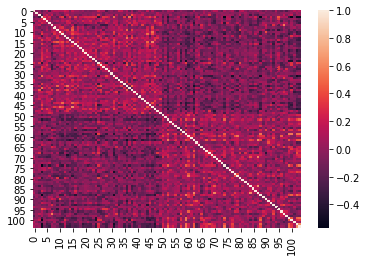

In [15]:
new_exp = clustered_expression(ten_clusters[min_idx])
new_corr = new_exp.corr()
sns.heatmap(new_corr)

### K = 4

In [16]:
ten_objectives = []
ten_clusters = []

for i in range(10):
    #get random centroids
    rand_inds = random.sample(range(0, len(expression)), 4)
    #create centroid dataframe 
    rand_centroids = create_rand_centroids(rand_inds)
    
    #run KMeans
    objectives, clusters = KMeans(k=4, expressionData=expression, centroids=rand_centroids)
    
    #add objective to objective list
    ten_objectives.append(objectives[-1])
    
    #add clusters to clusterlist
    ten_clusters.append(clusters)

In [17]:
min_idx = ten_objectives.index(min(ten_objectives))
print("objective: ", ten_objectives[min_idx])
all_min_objs.append(ten_objectives[min_idx])

objective:  1149434.8813976888


<AxesSubplot:>

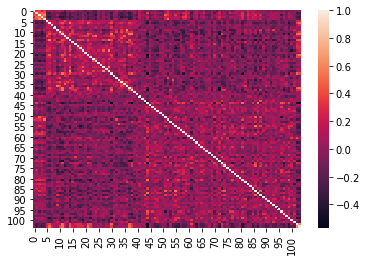

In [18]:
new_exp = clustered_expression(ten_clusters[min_idx])
new_corr = new_exp.corr()
sns.heatmap(new_corr)

### K = 5

In [19]:
ten_objectives = []
ten_clusters = []

for i in range(10):
    #get random centroids
    rand_inds = random.sample(range(0, len(expression)), 5)
    #create centroid dataframe 
    rand_centroids = create_rand_centroids(rand_inds)
    
    #run KMeans
    objectives, clusters = KMeans(k=5, expressionData=expression, centroids=rand_centroids)
    
    #add objective to objective list
    ten_objectives.append(objectives[-1])
    
    #add clusters to clusterlist
    ten_clusters.append(clusters)

In [20]:
min_idx = ten_objectives.index(min(ten_objectives))
print("objective: ", ten_objectives[min_idx])
all_min_objs.append(ten_objectives[min_idx])

objective:  1116400.1689870704


<AxesSubplot:>

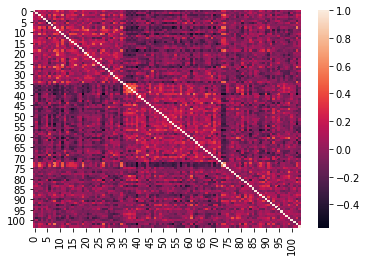

In [21]:
new_exp = clustered_expression(ten_clusters[min_idx])
new_corr = new_exp.corr()
sns.heatmap(new_corr)

### K = 6

In [22]:
ten_objectives = []
ten_clusters = []

for i in range(10):
    #get random centroids
    rand_inds = random.sample(range(0, len(expression)), 6)
    #create centroid dataframe 
    rand_centroids = create_rand_centroids(rand_inds)
    
    #run KMeans
    objectives, clusters = KMeans(k=6, expressionData=expression, centroids=rand_centroids)
    
    #add objective to objective list
    ten_objectives.append(objectives[-1])
    
    #add clusters to clusterlist
    ten_clusters.append(clusters)

In [23]:
min_idx = ten_objectives.index(min(ten_objectives))
print("objective: ", ten_objectives[min_idx])
all_min_objs.append(ten_objectives[min_idx])

objective:  1116535.8173579022


<AxesSubplot:>

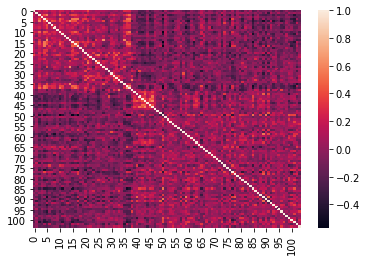

In [24]:
new_exp = clustered_expression(ten_clusters[min_idx])
new_corr = new_exp.corr()
sns.heatmap(new_corr)

### K = 7

In [25]:
ten_objectives = []
ten_clusters = []

for i in range(10):
    #get random centroids
    rand_inds = random.sample(range(0, len(expression)), 7)
    #create centroid dataframe 
    rand_centroids = create_rand_centroids(rand_inds)
    
    #run KMeans
    objectives, clusters = KMeans(k=7, expressionData=expression, centroids=rand_centroids)
    
    #add objective to objective list
    ten_objectives.append(objectives[-1])
    
    #add clusters to clusterlist
    ten_clusters.append(clusters)

In [26]:
min_idx = ten_objectives.index(min(ten_objectives))
print("objective: ", ten_objectives[min_idx])
all_min_objs.append(ten_objectives[min_idx])

objective:  1065165.014961748


<AxesSubplot:>

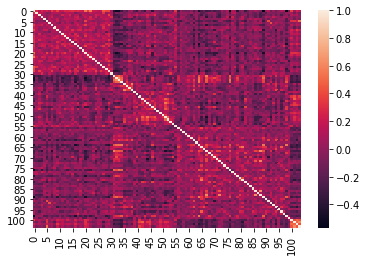

In [27]:
new_exp = clustered_expression(ten_clusters[min_idx])
new_corr = new_exp.corr()
sns.heatmap(new_corr)

### K = 8

In [28]:
ten_objectives = []
ten_clusters = []

for i in range(10):
    #get random centroids
    rand_inds = random.sample(range(0, len(expression)), 8)
    #create centroid dataframe 
    rand_centroids = create_rand_centroids(rand_inds)
    
    #run KMeans
    objectives, clusters = KMeans(k=8, expressionData=expression, centroids=rand_centroids)
    
    #add objective to objective list
    ten_objectives.append(objectives[-1])
    
    #add clusters to clusterlist
    ten_clusters.append(clusters)

In [29]:
min_idx = ten_objectives.index(min(ten_objectives))
print("objective: ", ten_objectives[min_idx])
all_min_objs.append(ten_objectives[min_idx])

objective:  1076034.6337181441


<AxesSubplot:>

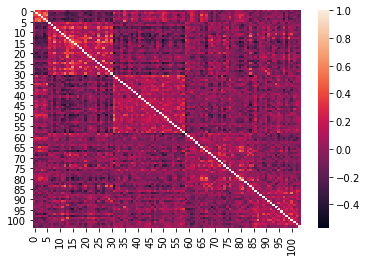

In [30]:
new_exp = clustered_expression(ten_clusters[min_idx])
new_corr = new_exp.corr()
sns.heatmap(new_corr)

### K = 9

In [31]:
ten_objectives = []
ten_clusters = []

for i in range(10):
    #get random centroids
    rand_inds = random.sample(range(0, len(expression)), 9)
    #create centroid dataframe 
    rand_centroids = create_rand_centroids(rand_inds)
    
    #run KMeans
    objectives, clusters = KMeans(k=9, expressionData=expression, centroids=rand_centroids)
    
    #add objective to objective list
    ten_objectives.append(objectives[-1])
    
    #add clusters to clusterlist
    ten_clusters.append(clusters)

In [32]:
min_idx = ten_objectives.index(min(ten_objectives))
print("objective: ", ten_objectives[min_idx])
all_min_objs.append(ten_objectives[min_idx])

objective:  1025200.2694271994


<AxesSubplot:>

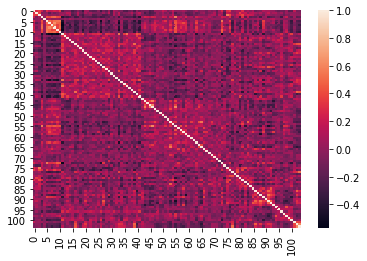

In [33]:
new_exp = clustered_expression(ten_clusters[min_idx])
new_corr = new_exp.corr()
sns.heatmap(new_corr)

### K = 10

In [34]:
ten_objectives = []
ten_clusters = []

for i in range(10):
    #get random centroids
    rand_inds = random.sample(range(0, len(expression)), 10)
    #create centroid dataframe 
    rand_centroids = create_rand_centroids(rand_inds)
    
    #run KMeans
    objectives, clusters = KMeans(k=10, expressionData=expression, centroids=rand_centroids)
    
    #add objective to objective list
    ten_objectives.append(objectives[-1])
    
    #add clusters to clusterlist
    ten_clusters.append(clusters)

In [35]:
min_idx = ten_objectives.index(min(ten_objectives))
print("objective: ", ten_objectives[min_idx])
all_min_objs.append(ten_objectives[min_idx])

objective:  1012644.5652628426


<AxesSubplot:>

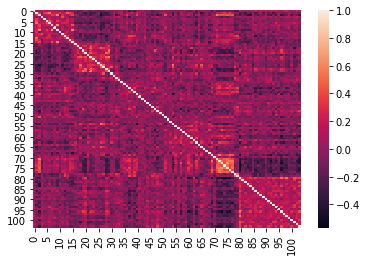

In [36]:
new_exp = clustered_expression(ten_clusters[min_idx])
new_corr = new_exp.corr()
sns.heatmap(new_corr)

### K = 11

In [37]:
ten_objectives = []
ten_clusters = []

for i in range(10):
    #get random centroids
    rand_inds = random.sample(range(0, len(expression)), 11)
    #create centroid dataframe 
    rand_centroids = create_rand_centroids(rand_inds)
    
    #run KMeans
    objectives, clusters = KMeans(k=11, expressionData=expression, centroids=rand_centroids)
    
    #add objective to objective list
    ten_objectives.append(objectives[-1])
    
    #add clusters to clusterlist
    ten_clusters.append(clusters)

In [38]:
min_idx = ten_objectives.index(min(ten_objectives))
print("objective: ", ten_objectives[min_idx])
all_min_objs.append(ten_objectives[min_idx])

objective:  993375.8776552024


<AxesSubplot:>

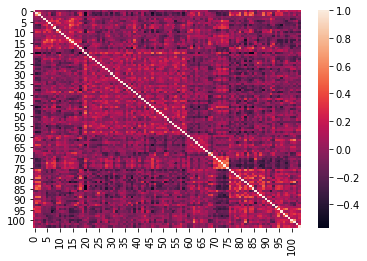

In [39]:
new_exp = clustered_expression(ten_clusters[min_idx])
new_corr = new_exp.corr()
sns.heatmap(new_corr)

### K = 12

In [40]:
ten_objectives = []
ten_clusters = []

for i in range(10):
    #get random centroids
    rand_inds = random.sample(range(0, len(expression)), 12)
    #create centroid dataframe 
    rand_centroids = create_rand_centroids(rand_inds)
    
    #run KMeans
    objectives, clusters = KMeans(k=12, expressionData=expression, centroids=rand_centroids)
    
    #add objective to objective list
    ten_objectives.append(objectives[-1])
    
    #add clusters to clusterlist
    ten_clusters.append(clusters)

In [41]:
min_idx = ten_objectives.index(min(ten_objectives))
print("objective: ", ten_objectives[min_idx])
all_min_objs.append(ten_objectives[min_idx])

objective:  1013935.5654322963


<AxesSubplot:>

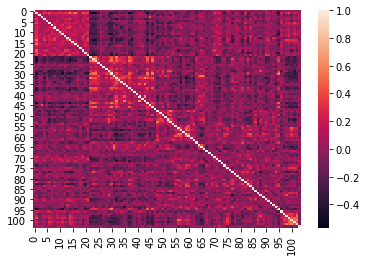

In [42]:
new_exp = clustered_expression(ten_clusters[min_idx])
new_corr = new_exp.corr()
sns.heatmap(new_corr)

## Plotting

In [43]:
all_min_objs

[1203932.2330671656,
 1149434.8813976888,
 1116400.1689870704,
 1116535.8173579022,
 1065165.014961748,
 1076034.6337181441,
 1025200.2694271994,
 1012644.5652628426,
 993375.8776552024,
 1013935.5654322963]

Text(0, 0.5, 'Objective')

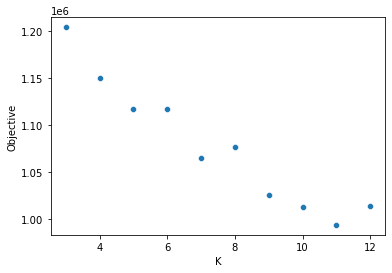

In [44]:
sns.scatterplot(x = range(3,13), y = all_min_objs)
plt.xlabel('K')
plt.ylabel('Objective')